# Nichtlineare Optimierung für reelle Funktionen

__Manfred Brill, Hochschule Kaiserslautern__

## Aufgabenstellung
Für eine Funktion f einer reellen Veränderlichen suchen wir ein lokales Minimum. Solche Fragestellungen haben wir bereits bei Parameterkurven bearbeitet und bei Abstiegsverfahren für die Berechnung eines lokalen Minimums eines skalaren Felds müssen wir diese Aufgabe ebenfalls lösen.

Man könnte auf die Idee kommen die Funktion f abzuleiten und eine Nullstelle dieser ersten Ableitung zu bestimmen. Verfahren für die Näherung von Nullstellen finden wir in SciPy. Aber dann müssen wir auch die zweite Ableitung aufstellen und die hinvereichende Bedingung überprüfen. Erfolgsversprechender ist es Verfahren einzusetzen, die ein Minimum annähern ohne eine Nullstelle einer Funktion zu bestimmen. Dabei gibt es Verfahren, die Informationen über die Ableitung verwenden. Aber es gibt auch sogenannte *ableitungsfreie* Verfahren, die außer der Möglichkeit, die Funktion auswerten zu können nur Informationen über geeignete Startwerde benötigen.

Eine Bemerkung zur Nomenklatur: in diesem Umfeld bezeichnen wir die Funktion f, die wir minimieren möchten, als *Zielfunktion* oder *objective function*.

## Ableitungsfreie Verfahren
Alle Verfahren die wir betrachten gehen von einer *unimodalen* Funktion in einem Intervall [a, b] aus. Damit ist gemeint, dass wir ein Intervall kennen von dem wir wissen, dass in diesem Intervall ein lokales Minimum vorliegt und dass die Funktion in diesem Intervall stetig ist. In der folgenden Grafik finden wir ein solches Beispiel. Es gibt ein lokales Minimum im Innern des Intervalls [0.5, 2.0].

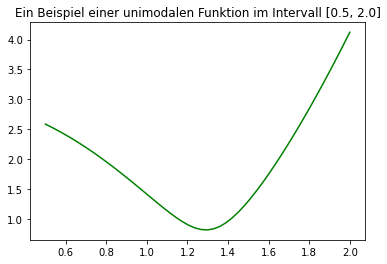

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def uniex(x):
    return np.sqrt(3.0*x*x*x*x - 10.0*x*x + 9)

x = np.linspace(0.5, 2.0, 50)
y = uniex(x)

fig = plt.figure()
plt.plot(x, y, 'g-')
plt.title('Ein Beispiel einer unimodalen Funktion im Intervall [0.5, 2.0]')

plt.show()

Wenn wir ein Intervall [a, b], im Beispiel oben ist dies [0.5, 2.0] mit einem unimodalen Verlauf des Funktionsgraphen gefunden haben, dann muss es einen Wert x=c im Inneren dieses Intervalls geben, für den die Ungleichungen

f(a) > f(c), f(b) > f(c)

erfüllt sind. In der englisch-sprachigen Literatur werden solche Werte a, c und b als *bracket* bezeichnet. Die Idee für das Verfahren
ist jetzt, einen weiteren x-Wert im Intervall [a, b] zu berechnen und aus diesen vier Punktnn mit Hilfe von Vergleichen für die Funktionswerte ein neues, kleineres Bracket zu berechnen. Also aus den vier Punkten ein neues bracket zu berechnen, das kleiner ist. Das machen wir so lange bis eine maximale Anzahl von Unterteilungen erreicht ist oder das Intervall [a, b] im bracket eine vorgegebene maximale Länge unterschreitet oder bis andere Abbruchkriterien erfüllt sind.

In der folgenden Abbildung verwenden wir ziemlich willkürlich c=0.8, offensichtlich bilden diese drei x-Werte ein bracket.

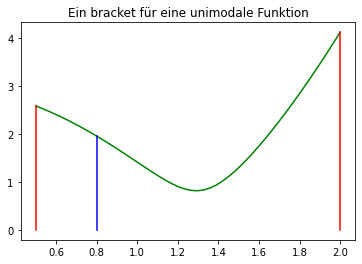

In [4]:
xaline = np.array([0.5, 0.5])
yaline = np.array([0.0, uniex(0.5)])
xbline = np.array([2.0, 2.0])
ybline = np.array([0.0, uniex(2.0)])
xcline= np.array([0.8, 0.8])
ycline= np.array([0.0, uniex(0.8)])

fig = plt.figure()
plt.plot(x, y, 'g-')
plt.plot(xaline, yaline, 'r-')
plt.plot(xbline, ybline, 'r-')
plt.plot(xcline, ycline, 'b-')

plt.title('Ein bracket für eine unimodale Funktion')

plt.show()

Jetzt wählen wir einen weiteren x-Wert aus und treffen dann eine Entscheidung, welches neue bracket wir anschließend verwenden.
In der Grafik, die wir jetzt mit Python erzeugen verwenden wir willkürlich den Wert x=1.8.

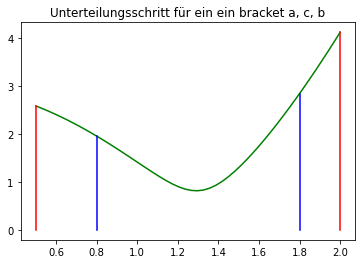

In [6]:
xaline = np.array([0.5, 0.5])
yaline = np.array([0.0, uniex(0.5)])
xbline = np.array([2.0, 2.0])
ybline = np.array([0.0, uniex(2.0)])
xcline= np.array([0.8, 0.8])
ycline= np.array([0.0, uniex(0.8)])
xline= np.array([1.8, 1.8])
yline= np.array([0.0, uniex(1.8)])

fig = plt.figure()
plt.plot(x, y, 'g-')
plt.plot(xaline, yaline, 'r-')
plt.plot(xbline, ybline, 'r-')
plt.plot(xcline, ycline, 'b-')
plt.plot(xline, yline, 'b-')

plt.title('Unterteilungsschritt für ein ein bracket a, c, b')

plt.show()

Wir können hier schon aus der Abbildung ablesen, dass die Werte 0.5, 0.8 und 1.8 ein neues, kleineres Bracket bilden. Wir setzen also
a=0.5, b=1.8 und c=0.8. Die andere Möglichkeit, 0.8, 1.8 und 2.0 erfüllen nicht die Forderung, dass die Funktion einen unimodalen Verlauf aufweist. Das Intervall [a, b] ist kleiner als vorher.

Gibt es Strategien für die Wahl von c und dem neuen vierten x-Wert? Als optimal haben sich hier der goldene Schnitt für die Unterteilung des Intervalls [a, b] herausgestellt. Das Verfahren, das diesen Ansatz verwendet nennen wir *golden section search*. Der goldene Schnitt ist eine irratinoale Zahl, so dass man häufig ausnutzt, dass wir diese Zahl als Quotient von Fibonacci-Zahlen annähern können. Daraus entsteht das Verfahren *Fibonacci Search*. Asymptotisch ist die Fibonacci search sehr nahe bei der golden section search. Wir erhalten damit ein stabiles Verfahren. Es kann passieren, dass wir eine größere Anzahl von Unterteilungen benötigen, aber das Verfahren bricht nie zusammen, was in den Anwendungen natürlich sehr wichtig ist.

Ein weitere Ansatz, der in der Praxis häufig zu guten Ergebnissen führt ist die Idee, die Funktion f die wir minimieren möchten im Intervall [a, b], in der sie unimodal ist, mit Hilfe eines quadratischen Polynoms anzunähern. Das wird möglich sein, wir verwenden die x-Werte eines brackets und die Funkiontswerte. Aus drei Wertepaaren können wir ein quadratisches Polynom berechnen, das diese Wertepaare interpoliert. Wir können das lokale Minimum des quadratrischen Polynoms bestimmen und anschließend wieder das Intervall, von dem wir wissen, dass es das lokale Minimum von f enthält verkleinern. Vorteil dieses Verfahrens ist, dass wir drei Funktionsauswerten statt vier bei golden section search benötigen.

Der *Brent*-Algorithmus implementiert eine *safe guarded quadratic interpolation* und kombiniert beide Ansätze. Damit entsteht ein sehr stabiler Algorithmus, der als *state-of-the-art* angesehen werden kann. Kein Wunder, dass SciPy dieses Verfahren für die skalare Optimierung anbietet.

## Realisierung in Scipy
In SciPy finden wir die Funktion *optimize.minimize_scalar*. Mit Hilfe des Parameters *method* können wir wählen, ob wir Golden Section Search oder Brent einsetzen möchten. Vorausgesetzt wird, dass wir eine Python-Funktion implementiert haben, die die Funktionswerte für die Zielfunktion f berechnet. Die Funktion bietet die Möglichkeit ein bracket zu übergeben. 

Wir verwenden ein Beispiele für f und geben den Funktionsgraphen aus, um sinnvolle Werte für ein bracket zu bestimmen.

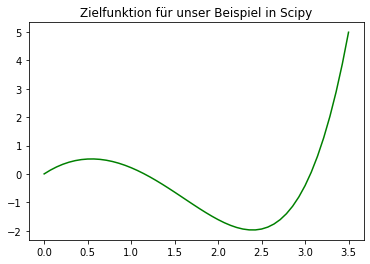

In [9]:
from scipy import optimize

def f(x):
    """
    Funktion, die minimiert werden soll
    """
    return (np.exp(x) - 2.5*x*x + x - 1.0)

a = 0.0
b = 3.5
x = np.linspace(a, b, 50)
y = f(x)

fig = plt.figure()
plt.plot(x, y, 'g-')
plt.title('Zielfunktion für unser Beispiel in Scipy')

plt.show()

Wir haben ein bracket mit a=0, c=2 und b=3.5. Dabei ist c=2.0 ziemlich willkürlich gewählt. Klar ist - die Lösung die SciPy berechnet wird im Intervall [a, b] liegen. Wir überprüfen ob wir ein Bracket gefunden haben, um zu vermeiden, dass SciPy eine Fehlermeldung ausgibt. In der Praxis werden wir f auch nicht plotten können. Es gibt heuristische Verfahren um ein bracket zu bestimmen. Das übernimmt, wenn wir kein bracket übergeben, SciPy für uns.

In [10]:
c = 2.0
print('f(0)=', f(a))
print('f(2)=', f(c))
print('f(3.5)=', f(b))

f(0)= 0.0
f(2)= -1.6109439010693496
f(3.5)= 4.9904519586923115


Jetzt können wir das Verfahren aufrufen. Dabei verwenden den Brent-Algorithmus. Im Anschluss überprüfen wir, ob die Funktion ohne Exception beendet wurde und geben in diesem Fall Informationen über die Ergebnisse aus. Anschließend zeichnen wir das Ergebnis in den Graphen der Zielfunktion ein.

Ergebnisse des Brent-Algorithmus
Der berechnete x-Wert des lokalen Minimums: 2.396138520421771
Der Funktionswert an diesem x-Wert: -1.9768683142947223
31 Funktionsauswertungen
27 Iterationen


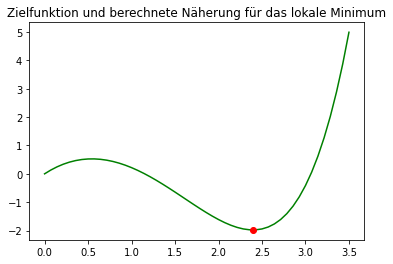

In [14]:
result = optimize.minimize_scalar(f,
                                  method='brent',
                                  bracket=(a, c, b),
                                  tol=np.finfo(1.).eps,
                                  options={'maxiter': 50})

if result.success:
    print('Ergebnisse des Brent-Algorithmus')
    print('Der berechnete x-Wert des lokalen Minimums:', result.x)
    print('Der Funktionswert an diesem x-Wert:', result.fun)
    print(result.nfev, 'Funktionsauswertungen')
    print(result.nit, 'Iterationen')
    
fig = plt.figure()
plt.plot(x, y, 'g-')
plt.plot(result.x, result.fun, 'ro')
plt.title('Zielfunktion und berechnete Näherung für das lokale Minimum')

plt.show()

Als Alternative verwenden wir golden section search. Dabei müssen wir die maximale Anzahl der Iterationen erhöhen. Man sieht an Hand dieses Beispiels gut, dass die Kombination zwischen quuadratischer Interpolation und Intervallteilung im Brent-Algolrithmus Vorteile hat. Der berechnete x-Wert liegt sehr nahe beim Ergebnis des Brent-Algorithmus, so dass wir auf eine grafische Darstellung verzichten.

In [15]:
result = optimize.minimize_scalar(f,
                                  method='golden',
                                  bracket=(0.0, 2.0, 3.5),
                                  tol=np.finfo(1.).eps,
                                  options={'maxiter': 100})

if result.success:
    print('Ergebnisse der Golden Section Search')
    print('Der berechnete x-Wert des lokalen Minimums:', result.x)
    print('Der Funktionswert an diesem x-Wert:', result.fun)
    print(result.nfev, 'Funktionsauswertungen')
    print(result.nit, 'Iterationen')

Ergebnisse der Golden Section Search
Der berechnete x-Wert des lokalen Minimums: 2.3961385102724924
Der Funktionswert an diesem x-Wert: -1.9768683142947223
80 Funktionsauswertungen
75 Iterationen


## Anwendung auf die Lemniskate von Gerono
Suchen wir minimale oder maximale x- und y-Werte der Spur einer ebenen Parameterkurve wie der Lemniskate von Gerono können wir die beschriebenen
Verfahren gut einsetzen. Wir suchen im Beispiel nach einem lokalen Minimum der y-Koordinaten der Spur. 
Dann verwenden wir die Funktion in der Definition
der Lemmiskate, die für die y-Koordinaten verantwortlich ist. Wir verwenden hier kein bracket sondern beschränken uns darauf ein Intervall anzugeben in dem wir das Minimum vermuten.

Wir geben wieder die Ergebnisse des Algorithmus aus und zeichnen anschließend die Lemniskate von Gerono und markieren den berechnente Punkt, um uns von der Qualität der Berechnung zu überzeugen.


Lokales Minimum für die y-Koordinaten der Lemniskate von Gerono
Der berechnete t-Wert des lokalen Minimums: 5.497787144430887
Der Funktionswert an diesem t-Wert: -0.5000000000000001
Die exakte Lösung lautet t = 5.497787143782138
Relativer Fehler: 1.1646307819549499e-09


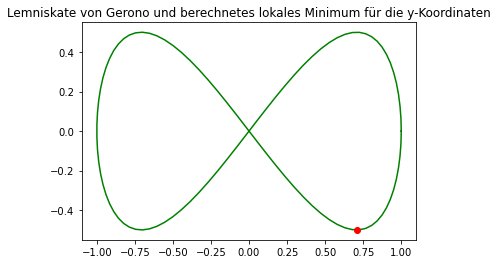

In [18]:
def g(t):
    """
    Funktion für die y-Koordinaten der Lemniskate von Gerono
    """
    return np.sin(t)*np.cos(t)

a = 1.25*np.pi
b = 2.0*np.pi

result = optimize.minimize_scalar(g,
                                  method='brent',
                                  bracket=(a, b),
                                  tol=np.finfo(1.).eps,
                                  options={'maxiter': 50})

if result.success:
    print('\nLokales Minimum für die y-Koordinaten der Lemniskate von Gerono')
    print('Der berechnete t-Wert des lokalen Minimums:', result.x)
    print('Der Funktionswert an diesem t-Wert:', result.fun)
    print('Die exakte Lösung lautet t =', 1.75*np.pi)
    print('Relativer Fehler:',
          np.abs((result.x-1.75*np.pi)/1.75*np.pi))
    
def lemniskateGerono(n=10, a=0.0, b=2.0*np.pi):
    t = np.linspace(a, b, n)
    x = np.cos(t)
    y = np.sin(t)*np.cos(t)
    return x, y

x, y = lemniskateGerono(n=100)

xmin, ymin = np.cos(result.x), g(result.x)
fig = plt.figure()
plt.plot(x, y, 'g-')
plt.plot(xmin, ymin, 'ro')
plt.title('Lemniskate von Gerono und berechnetes lokales Minimum für die y-Koordinaten')

plt.show()

Es gibt zwei lokale Minima für die y-Koordinaten der Lemniskate von Gerono. Dass wir das angezeigte Ergebnis erhalten haben liegt an der Wahl für das Intervall [a, b], das wir beim Start des Brent-Algorithmus übergeben haben. Variieren wir dies können wir auch das alternative lokale Minimum erhalten. Das wird den Lesern dieses Notebooks überlassen :-)


## Berechnung von lokalen Maxima
Wir suchen vergeblich nach Funktionen in SciPy mit denen wir ein lokales Maximum berechnen können. Das führen wir
mit Hilfe von -f durch, also der mit (-1) multiplizierten Zielfunktion. Ein lokales Minimum von -f ist ein lokale Maximum von f.

Damit suchen wir nach lokalen Maxima für die y-Koordinaten der Lemniskate von Gerono. Wieder zeichnen wir das berechnete Ergebnis in die Darstellung der Parameterkurve ein.


Lokales Maximum für die y-Koordinaten der Lemniskate von Gerono
Der berechnete t-Wert des lokalen Maximums: 0.7853981628127534
Der Funktionswert an diesem t-Wert: -0.5000000000000001
Die exakte Lösung lautet t = 0.7853981633974483
Relativer Fehler: 7.347492157451213e-09


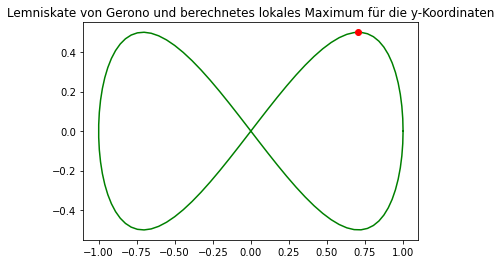

In [20]:
def gminus(t):
    """
    Funktion für die y-Koordinaten der lemniskate von Gerono,
    mit -1 multipliziert für lokale Maxima
    """
    return -np.sin(t)*np.cos(t)

a = 0.0
b = 1.2

print('\nLokales Maximum für die y-Koordinaten der Lemniskate von Gerono')
result = optimize.minimize_scalar(gminus,
                                  method='brent',
                                  bracket=(a, b),
                                  tol=np.finfo(1.).eps,
                                  options={'maxiter': 50})

if result.success:
    print('Der berechnete t-Wert des lokalen Maximums:', result.x)
    print('Der Funktionswert an diesem t-Wert:', result.fun)
    print('Die exakte Lösung lautet t =', 0.25*np.pi)
    print('Relativer Fehler:',
          np.abs((result.x-0.25*np.pi)/0.25*np.pi))
    
xmin, ymin = np.cos(result.x), g(result.x)
fig = plt.figure()
plt.plot(x, y, 'g-')
plt.plot(xmin, ymin, 'ro')
plt.title('Lemniskate von Gerono und berechnetes lokales Maximum für die y-Koordinaten')

plt.show()

Auch hier gibt es wieder ein weiteres mögliches Ergebnis, das wir mit einem alternativen Startintervall [a, b] für den Brent-Algorithmus berechnen können.